<a href="https://colab.research.google.com/github/amanchanagaraju/ML/blob/main/covolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Computer vision libraries in PyTorch
Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

torchvision	Contains datasets, model architectures and image transformations often used for computer vision proble



torchvision.models	This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.

torchvision.datasets	Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.

torchvision.transforms	Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.


torch.utils.data.DataLoader	Creates a Python iteralbe over a dataset (created with torch.utils.data.Dataset).


In [ ]:
import torch
from torch import nn
# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
# visulization for matplotlib
import matplotlib.pyplot as plt


In [ ]:
print(torch.__version__)
print(torchvision.__version__)


2.0.0+cu118
0.15.1+cu118


#Getting a data set

In [ ]:
train_data=datasets.FashionMNIST(
    root="data",#whre to download data
    train=True,#do we want train dataset?
    download=True,#do we want to download?
    transform=torchvision.transforms.ToTensor(),#how do we want to transform data?
    target_transform=None#how do we want to transform the labels
)
test_data=datasets.FashionMNIST(
    root="data",#whre to download data
    train=False,#do we want train dataset?
    download=True,#do we want to download?
    transform=torchvision.transforms.ToTensor(),#how do we want to transform data?
    target_transform=None#how)
)

In [ ]:
len(train_data), len(test_data)


(60000, 10000)

In [ ]:
image, label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
#check the shape
image.shape,label

(torch.Size([1, 28, 28]), 9)

# visualize our data

Image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

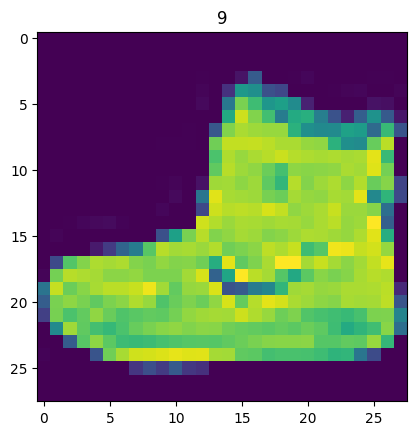

In [ ]:
import matplotlib.pyplot as plt
image,label=train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

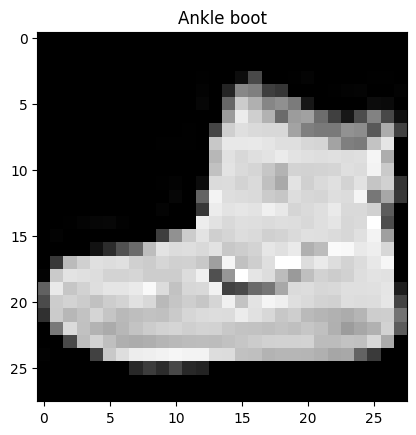

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])

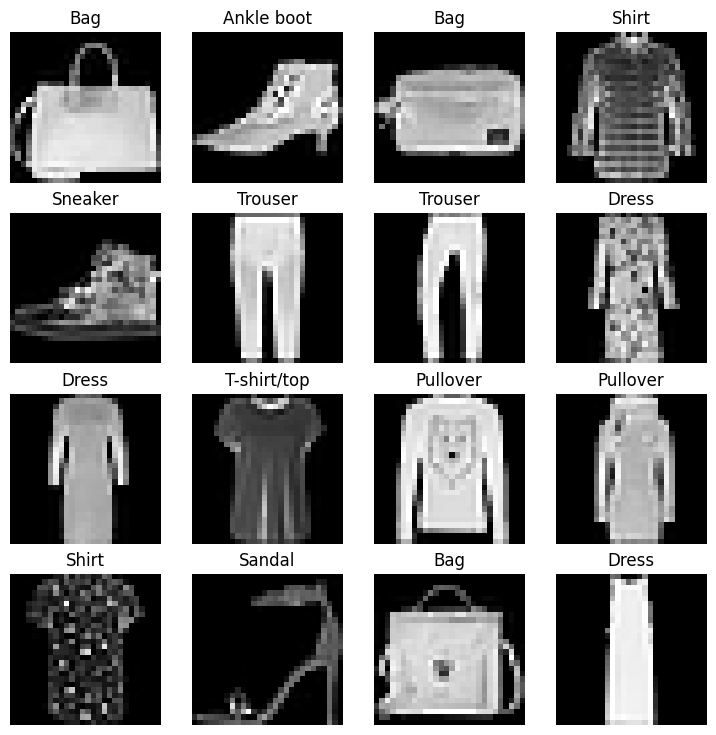

In [ ]:
#plot more images
#torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
   random_idx=torch.randint(0,len(train_data),size=[1]).item()
   img,label=train_data[random_idx]
   fig.add_subplot(rows,cols,i)
   plt.imshow(img.squeeze(),cmap="gray")
   plt.title(class_names[label])
   plt.axis(False)


#do you think these items of clothing (imaages) could be modelled with pure linear lines?

#prepare data loader

right now, our data is in form of pytorch datasets.

Dataloader turns our dataset into a python iterable

mora specifically, we want to turn our data into batches (or mini batches)

why

1.It is more computationally effiecent,as in,your computing hardware may not be able to look at 60000 images at onece

2.it will give our neural network more chances to updaate its gradients per epoch

In [ ]:
from torch.utils.data  import DataLoader
# Set up the batch size hyperparameter
Batch_size=32
# turn data sets into iterables(batches)
train_dataloader=DataLoader(dataset=train_data,batch_size=Batch_size,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=Batch_size,
                            shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f4f231582b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f4f23158340>)

In [ ]:
print(f"Dataloaders: {train_dataloader,test_dataloader}")
train_features_batch,train_labels_batch=next(iter(train_dataloader))

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f4f231582b0>, <torch.utils.data.dataloader.DataLoader object at 0x7f4f23158340>)


Image size:torch.Size([1, 28, 28])
Label:8,label size:torch.Size([])


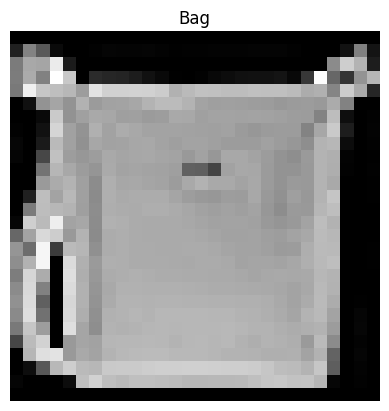

In [ ]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label:{label},label size:{label.shape}")

In [ ]:
##3.model_0 Build baseline model
#creating a flatten layer
flatten_model=nn.Flatten()
#get a single sample
x=train_features_batch[0]
#flatten sample
output=flatten_model(x)
#Print out what happened
print(f"Shape before flatten:{x.shape}->[color_channel,heght,width]")

print(f'after flatten:{output.shape}->[color_channels,h*w]')


NameError: ignored

In [ ]:
from torch.nn.modules.linear import Linear
from torch import nn
class FashionMNISTModeV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
#setup model with input parameters
model_0=FashionMNISTModeV0(input_shape=784,
                           hidden_units=10,
                           output_shape=len(class_names))
model_0


FashionMNISTModeV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)



tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

# 3.1 stepup loss_fn,optimizer


3.1 Setup loss, optimizer and evaluation metrics
Since we're working on a classification problem, let's bring in our helper_functions.py script and subsequently the accuracy_fn() we defined in notebook 02.

Note: Rather than importing and using our own accuracy function or evaluation metric(s), you could import various evaluation metrics from the TorchMetrics package.



In [ ]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("file exist")
else:
  print("downloading")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f :
    f.write(request.content)
    

file exist


In [ ]:

#setup loss_fn,optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)



## 3.2 creating a function to time out experiments


In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,end=float,
                     device:torch.device=None):
  """Prints difference between start and end time,"""
  total_time=end-start
  print(f"Train time on {device}:{total_time:3f} seconds")
  return total_time


In [ ]:
from prompt_toolkit.shortcuts import print_formatted_text
start_time=timer()
end_time=timer()
print_train_time(start_time,end_time)


Train time on None:0.000048 seconds


4.814000021724496e-05

In [ ]:
def accuracy_fn(y_true,y_pred):

  correct = torch.eq(y_true, y_pred).sum().item()
  acc=(correct/len(y_pred) )* 100
  return acc      
        


#create a training loop and training a model on batches

1.loop through epochs

2.loop through training batches,perform training steps,calculate the trainloss per batch

2.loop through testing batches,perform testing steps,calculate the testloss per batch

In [ ]:
# import tqdm
from tqdm.auto import tqdm
# set the seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()
epochs=3
# create train and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-------")
  ##training
  train_loss=0
  #add a loop to loop through the training batches
  for batch,(X,y)in enumerate(train_dataloader):
    model_0.train()
    #1.Forward pass
    y_pred=model_0(X)
    #2.Calculate loss(per batch)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch%400==0:
      print(f"looked at {batch*len(X)}/{len(train_dataloader.dataset)}samples")
  train_loss/=len(train_dataloader)
  ##testing
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred=model_0(X_test)
      #cal loss
      test_loss+=loss_fn(test_pred,y_test)
      #.cal acc
      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
      #calculate the test loss
    test_loss/=len(test_dataloader)
    #cal acc
    test_acc/=len(test_dataloader)
  #print whats happening
  print(f"\nTrain loss{train_loss:.4f} |  testloss:{test_loss:.4f},Testacc:{test_acc}")

#calculate training time
train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(train_time_start_on_cpu,train_time_end_on_cpu,
                                          device=str(next(model_0.parameters())))













  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
looked at 0/60000samples
looked at 12800/60000samples
looked at 25600/60000samples
looked at 38400/60000samples
looked at 51200/60000samples

Train loss0.5904 |  testloss:0.5095,Testacc:82.03873801916933
Epoch:1
-------
looked at 0/60000samples
looked at 12800/60000samples
looked at 25600/60000samples
looked at 38400/60000samples
looked at 51200/60000samples

Train loss0.4763 |  testloss:0.4799,Testacc:83.19688498402556
Epoch:2
-------
looked at 0/60000samples
looked at 12800/60000samples
looked at 25600/60000samples
looked at 38400/60000samples
looked at 51200/60000samples

Train loss0.4550 |  testloss:0.4766,Testacc:83.42651757188499
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0

#4.Make predictions and get model0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make predicictions
      y_pred=model(X)
      #Accumulate thje loss and acc values per batch
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y,y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}


#calculate model0 results
model_0_results=eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModeV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
##5.setup device agnotist code
torch.cuda.is_available()

False

In [ ]:
import torch
device="cuda" if torch.cuda.is_available()else "cpu"
device

'cpu'

##6.building a better model with non-linearity


In [ ]:
class FashionMNISTModeV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()

    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
#create an instance of model_1
torch.manual_seed(42)
model_1=FashionMNISTModeV1(784,10,len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

###6.1 setup loss,optimer and evaluation metrics

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)



###6.2 Functionizing training and evaluation/testingloops

In [ ]:


def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  
 ##training:
  train_loss,train_acc=0,0
  model_1.train()
  #add a loop to loop through the training batches
  for batch,(X,y)in enumerate(data_loader):
    X,y=X.to(device),y.to(device)
    #1.Forward pass
    y_pred=model(X)
    #2.Calculate loss(per batch)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y,y_pred.argmax(1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"\nTrain loss:{train_loss:.5f}  |  Train acc:{test_acc:.2f}")




In [ ]:
def test_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  model_1.eval()
  test_loss,test_acc=0,0
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)
      test_pred=model(X)
      #cal loss
      test_loss+=loss_fn(test_pred,y)
      #.cal acc
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
      #calculate the test loss
    test_loss/=len(data_loader)
    #cal acc
    test_acc/=len(data_loader)
    #print whats happening
    print(f"\n testloss:{test_loss:.4f},Testacc:{test_acc}")



In [ ]:
torch.manual_seed(42)

from  timeit import default_timer as timer
train_time_start_on_gpu=timer()
#set epoch
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-------")
  train_step(model=model_1,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device
    )
  test_step(model=model_1,
             data_loader=test_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device
    )
train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,
                                         end= train_time_end_on_gpu,
                                          device=device)
     

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------

Train loss:1.09199  |  Train acc:83.43

 testloss:0.9564,Testacc:64.99600638977635
Epoch:1
-------

Train loss:0.78101  |  Train acc:83.43

 testloss:0.7223,Testacc:73.91174121405751
Epoch:2
-------

Train loss:0.67027  |  Train acc:83.43

 testloss:0.6850,Testacc:75.01996805111821
Train time on cpu:47.360063 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModeV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_0

45.55235868300042

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):
  
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y=X.to(device),y.to(device)
      # Make predicictions
      y_pred=model(X)
      #Accumulate thje loss and acc values per batch
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y,y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}


In [ ]:

model_1_results=eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModeV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

Model 2 CNN Building

[visualize cnn]https://poloclub.github.io/cnn-explainer/

In [ ]:
#create a cnn
import torch
from torch import nn
class FashionMNISTModeV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),#values we can set ourselves is called hyper paramters
   
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),#values we can set ourselves is called hyper paramters
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block_1(x)
    #print(x.shape)
    x=self.conv_block_2(x)
    #print(x.shape)
    x=self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_2=FashionMNISTModeV2(input_shape=1,
                           hidden_units=10,
                           output_shape=len(class_names)).to(device)
model_2                                                   

FashionMNISTModeV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

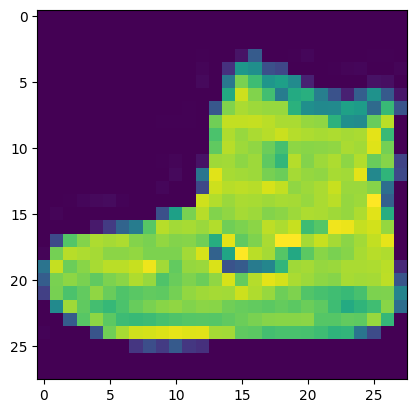

In [ ]:
plt.imshow(image.squeeze())

# 7.1 Stepping through nn.conv2d()

In [ ]:
torch.manual_seed(42)
#Create batch of images
images=torch.randn(size=(32,3,64,64))
test_image=images[0]
print(f"Image batch Shape:{images.shape}")
print(f"Single image shape:{test_image.shape}")
print(f"Test image:{test_image}")



Image batch Shape:torch.Size([32, 3, 64, 64])
Single image shape:torch.Size([3, 64, 64])
Test image:tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.797

In [ ]:
#Create a single con@d
conv_layer=nn.Conv2d(in_channels=3,
                    out_channels=10,
                    kernel_size=3,
                    stride=1,
                    padding=0)
test_image.unsqueeze(0).shape
conv_output=conv_layer(test_image.unsqueeze(dim=0))
conv_output

tensor([[[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
            6.6224e-01, -2.3216e-01],
          [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
           -1.8552e-01, -5.7622e-01],
          [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
            1.4923e-01,  1.4236e-01],
          ...,
          [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
            4.2594e-01, -4.8341e-01],
          [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
           -3.6626e-01,  3.5645e-01],
          [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
           -4.9680e-01, -7.2258e-01]],

         [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
           -1.7643e+00,  2.5263e-01],
          [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
            4.8068e-01,  8.4869e-01],
          [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
            2.4611e-01,  6.6233e-01],
          ...,
     

In [ ]:
conv_output.shape

torch.Size([1, 10, 62, 62])

# 7.2 Stepping through nn.MaxPool2d()


In [ ]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape:{test_image.shape}")
print(f"Test image with unsqueezed dimension:{test_image.unsqueeze(0).shape}")

#Create a sample nn.MaxPool2d layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass data through just the conv_layer
test_image_through_conv=conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer():{test_image_through_conv.shape}")
#Pass data through the max pool layer
test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(f"Shape after going through come_layer():{test_image_through_conv_and_max_pool.shape}")

Test image original shape:torch.Size([3, 64, 64])
Test image with unsqueezed dimension:torch.Size([1, 3, 64, 64])
Shape after going through conv_layer():torch.Size([1, 10, 62, 62])
Shape after going through come_layer():torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
#create a random tensor with a similar number of dime\ions
random_tensor=torch.randn(size=[1,1,2,2])
print(f"\nRandom tensor:{random_tensor}")
print(f"Random tensor shape :{random_tensor.shape}")
max_pool_layer=nn.MaxPool2d(kernel_size=2)
max_pool_tensor=max_pool_layer(random_tensor)
print(f"\nMaxPool tensor :{max_pool_tensor}")
print(f"Max pool tensor shape :{max_pool_tensor.shape}")
random_tensor


Random tensor:tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape :torch.Size([1, 1, 2, 2])

MaxPool tensor :tensor([[[[0.3367]]]])
Max pool tensor shape :torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

In [ ]:
rand_image_tensor=torch.randn(size=(1,28,28)).to(device)
rand_image_tensor

tensor([[[ 1.7878e+00, -4.7805e-01, -2.4286e-01, -9.3416e-01, -2.4826e-01,
          -1.2082e+00, -4.7767e-01,  5.2013e-01, -1.5673e+00, -2.3945e-01,
           2.3228e+00, -9.6337e-01,  2.0024e+00,  4.6643e-01,  1.5730e+00,
          -9.2283e-01,  3.5586e-01, -6.8662e-01, -4.9336e-01,  2.4149e-01,
          -1.1109e+00,  9.1546e-02, -2.3169e+00, -2.1680e-01, -3.0973e-01,
          -3.9571e-01,  8.0341e-01, -6.2160e-01],
         [-5.9200e-01, -6.3074e-02, -8.2855e-01,  3.3090e-01,  3.4912e-02,
           3.2110e-01,  1.5736e+00, -8.4547e-01,  1.3123e+00,  6.8716e-01,
          -1.0892e+00, -3.5529e-01, -1.4181e+00,  8.9627e-01,  4.9905e-02,
           2.2667e+00,  1.1790e+00, -4.3445e-01, -1.3864e+00, -1.2862e+00,
          -8.3712e-01, -9.2239e-01,  1.8113e+00,  1.6056e-01,  3.6725e-01,
           1.7541e-01,  1.3852e+00, -4.4585e-01],
         [-1.2024e+00,  7.0781e-01, -1.0759e+00,  5.3565e-01,  1.1754e+00,
           5.6117e-01, -4.5275e-01, -7.7178e-01,  1.4534e-01,  2.3105e-01,


In [ ]:
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], grad_fn=<AddmmBackward0>)

#7.3 setup a loss function and optimizer for model_2

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)


In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

###7.4 Training and "model_2" using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#Measure time
from timeit import default_timer as timer 
train_time_start_model_2=timer()
#train and test model
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"epoch:{epoch}\n------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(train_time_start_model_2,
                                          train_time_end_model_2,
                                          device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
------

Train loss:0.59518  |  Train acc:83.43

 testloss:0.3950,Testacc:85.99241214057508
epoch:1
------

Train loss:0.36536  |  Train acc:83.43

 testloss:0.3524,Testacc:86.91094249201278
epoch:2
------

Train loss:0.32588  |  Train acc:83.43

 testloss:0.3272,Testacc:88.06908945686901
Train time on cpu:234.510304 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):
  
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y=X.to(device),y.to(device)
      # Make predicictions
      y_pred=model(X)
      #Accumulate thje loss and acc values per batch
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y,y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}


In [ ]:
model_2_results=eval_model(
    model= model_2,data_loader=test_dataloader,
    loss_fn=loss_fn,accuracy_fn=accuracy_fn
    
)

test_dataloader

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
campare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
campare_results

,model_name,model_loss,model_acc
0,FashionMNISTModeV0,0.476639,83.426518
1,FashionMNISTModeV1,0.685001,75.019968
2,FashionMNISTModeV2,0.327190,88.069089


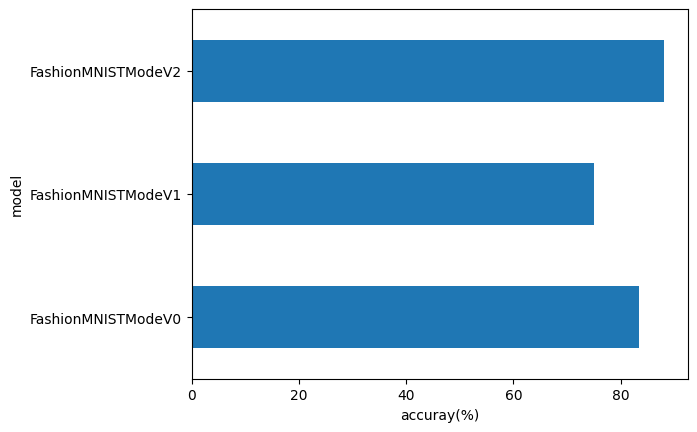

In [ ]:
# visualise
campare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuray(%)")
plt.ylabel("model");

#9. make predictions

In [ ]:
data

NameError: ignored

In [ ]:
def make_predictions(model,
                     data:list,
                     device):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0).to(device)
      #forward pass (model outputs raw logits)
      pred_logit=model(sample)
      #Get predictions probability
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
      #Get pred_prob of the gpu for fuher calculations
      pred_probs.append(pred_prob.cpu())

  #stack the pred_probs to turn list into tensor
  return torch.stack(pred_probs)




In [ ]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape




In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
#Make predictions
pred_probs=make_predictions(model=model_2,
                            data=test_samples,device=device)
#view first two prediction probabilites
pred_probs[:2]

In [ ]:
#convert predicton prbabilites to labels
pred_classes=pred_probs.argmax(dim=1)
pred_classes

In [ ]:
test_labels

In [ ]:
#plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  #create sublot
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  # plot the target image
  pred_label=class_names[pred_classes[i]]
  #get the truth label (in text forms)
  truth_label=class_names[test_labels[i]]
  #create a title for the plot 
  title_text=f"Pred: {pred_label} |  Truth: {truth_label}"
  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,c="g")#green text if prediction same
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)


# making a confusion matix

A confusion matrix is fantactic way of evaluating

1.make predictions with our trained model on test datasets

2.Make a confusion matrix 'torch.metrics'

3.plot confusion matrix

https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/


In [ ]:
# Import tqdm.auto:
from tqdm.auto import tqdm
#!.Make predictions with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making predictions...."):
    #send the data and targets to target device
    X,y=X.to(device),y.to(device)
    #Do the forward pass
    y_logit=model_2(X)
    #Trun predictions from logits -> prediction probabilites->prediction labels
    y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    #Put predictipons on cpu for evaluation
    y_preds.append(y_pred.cpu())

  #Concatenate list of predictions into tensor
  print(y_preds)
  y_pred_tensor=torch.cat(y_preds)
  y_pred_tensor[:10]

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 9, 7, 5,
        1, 2, 6, 3, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 1, 4, 6, 4, 4, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([6, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([8, 2, 3, 8, 0, 9, 4, 8, 4, 2, 6, 5, 6, 1, 2, 1, 3, 6, 8, 1, 0, 9, 3, 6,
        7, 9, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 6, 8, 3, 6, 1, 1, 6, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 6, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 4, 9, 2, 2, 8, 6, 4,
        6, 2, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 2,
       

In [ ]:
import mlxtend
mlxtend.__version__

'0.22.0'

In [ ]:
try:
  import torchmetrics,mlxtend
  print(f"mlxtend version:{mlxtent.__version__}")
  assert int(mlxtend.__version__.spilt(".")[1]>=19,"mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")


mlxtend version:0.22.0


In [ ]:
 class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

([<matplotlib.axis.XTick at 0x7f4f23159e10>,
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')])

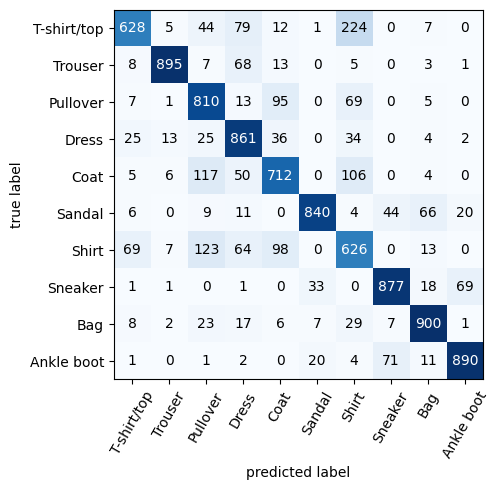

In [ ]:
from sklearn.metrics import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix
#2. Setup confusion instance and campare predictions to targets
cm=confusion_matrix(test_data.targets,y_pred_tensor.numpy())
plot_confusion_matrix(cm)
plt.yticks(range(10),list(class_names))
plt.xticks(range(10),list(class_names),rotation=60)

In [ ]:
from pathlib import Path
#Create model dictory path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
#create model and save
MODEL_NAME="convolution.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
#save the model
print(f"saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
          f=MODEL_SAVE_PATH) 


saving model to:models/convolution.pth
